In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Read index  
    
    
dir_path = '/home/samuel/Documents/PhD/Quasispecies/Data/'
index_name =  dir_path + 'seqs_index.dict'

index_dict = {}

with open(index_name, 'r') as f:
    for line in f:
        L = line.split('\t')
        index_dict[L[1][:-1]] = int(L[0])
seqs_list = list(index_dict.keys())


In [5]:
a = seqs_list[2]
b = seqs_list[0]
c = seqs_list[1]
d = seqs_list[22]

In [6]:
def distance(seq, seq_ref):
    '''
        Function that returns the Humming distance between
        two sequences
        Input:
            -sequence to compare
            -reference sequence
        Return:
            -int : distance
    '''
    d=0
    for char in range(len(seq_ref)):
        if seq[char] != seq_ref[char]:
            d+=1
    return d

In [7]:
max_d = 0
dist_dict = {}

for sequence in seqs_list:
    if 'N' not in sequence:
        d = distance(sequence, a)
        seq_id = index_dict[sequence]
        #print(f'Distance={d} between {seq_id} and wt')
        try: dist_dict[d] +=1
        except: dist_dict[d] =1
        if d>max_d:
            max_d = d
            print(f'\t\tMaximum updated to {max_d}')
print(f'\t\tMaximum = {max_d}')

		Maximum updated to 1
		Maximum updated to 2
		Maximum updated to 3
		Maximum updated to 4
		Maximum updated to 7
		Maximum updated to 8
		Maximum updated to 19
		Maximum updated to 23
		Maximum updated to 26
		Maximum updated to 30
		Maximum updated to 33
		Maximum updated to 40
		Maximum updated to 47
		Maximum updated to 73
		Maximum updated to 78
		Maximum updated to 95
		Maximum = 95


In [8]:
dict(sorted(dist_dict.items()))

x = np.array(list(dist_dict.keys()))
x.sort()
y = np.array([dist_dict[d] for d in x ])

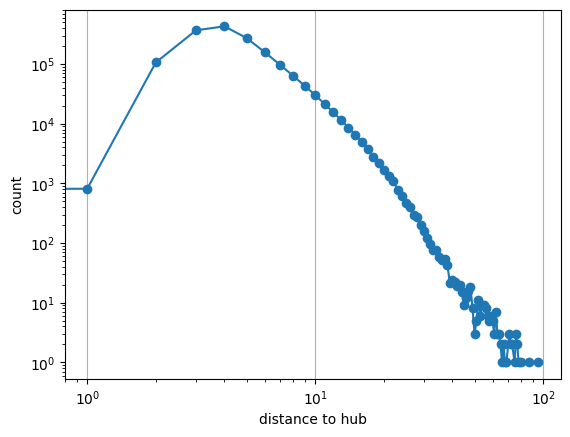

In [9]:
plt.plot(x,y, 'o-')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('count')
plt.xlabel('distance to hub')

ax = plt.gca()
ax.xaxis.grid()

In [10]:
#Given a sequence, get all sequences with neutral mutations

codon_2_seq = {
    'UUU': 'F', 
    'UUC': 'F',
    'UUA': 'L',
    'UUG': 'L',
    'UCU': 'S', 
    'UCC': 'S',
    'UCA': 'S',
    'UCG': 'S',
    'UAU': 'Y', 
    'UAC': 'Y',
    'UAA': 'Stop',
    'UAG': 'Stop',
    'UGU': 'C', 
    'UGC': 'C',
    'UGA': 'Stop',
    'UGG': 'W',
    'CUU': 'L', 
    'CUC': 'L',
    'CUA': 'L',
    'CUG': 'L',
    'CCU': 'P', 
    'CCC': 'P',
    'CCA': 'P',
    'CCG': 'P',
    'CAU': 'H', 
    'CAC': 'H',
    'CAA': 'Q',
    'CAG': 'Q',
    'CGU': 'R', 
    'CGC': 'R',
    'CGA': 'R',
    'CGG': 'R',
    'AUU': 'I', 
    'AUC': 'I',
    'AUA': 'I',
    'AUG': 'M',
    'ACU': 'T', 
    'ACC': 'T',
    'ACA': 'T',
    'ACG': 'T',
    'AAU': 'N', 
    'AAC': 'N',
    'AAA': 'K',
    'AAG': 'K',
    'AGU': 'S', 
    'AGC': 'S',
    'AGA': 'R',
    'AGG': 'R',
    'GUU': 'V', 
    'GUC': 'V',
    'GUA': 'V',
    'GUG': 'V',
    'GCU': 'A', 
    'GCC': 'A',
    'GCA': 'A',
    'GCG': 'A',
    'GAU': 'D', 
    'GAC': 'D',
    'GAA': 'E',
    'GAG': 'E',
    'GGU': 'G', 
    'GGC': 'G',
    'GGA': 'G',
    'GGG': 'G'
}

def seq_2_amino(seq, initial=0):
    '''
    Function that given a sequence, return the aminoacid that it expresses.
    
    Input:
        -sequence of DNA or RNA 
        -initial position of reading (ORF) (Optional)
    Output:
        -list of aminoacids
    '''
    x = seq#[::-1]
    x = str(x[initial:]).upper()
    x = x.replace('T', 'U')
    x = list(x)
    aminos = []
    for i in range(len(x)//3):
        codon=''.join(x[3*i:3*i+3])
        codon = str(codon)
        try:
            amin = codon_2_seq[codon]
            #print(f'aminoacid={amin}')
            aminos.append(amin)
        except:
            print(f'codon {codon} not in dict')
    aminos = ''.join(aminos)
    aminos = aminos.split('Stop')
    return aminos

def compare_proteins(amin_1, amin_2):
    '''
    Function that compares two aminoacid and returns the differences.
    Input:
        -amin_1 & amin_2, aminoacids to compare
    Output:
        -dict having position: nucl_amin_1, nucl_amin_2
    '''
    results = {}
    
    if len(amin_1) != len(amin_2):
        #print('Aminoacids of different length!')
        return None
    else:
        for i in range(len(amin_1)):
            if amin_1[i] != amin_2[i]:
                results[i] = [amin_2[i], amin_1[i]]
    return results

In [42]:
interest_indexes = [0,1,2,12,22]
amino_ref = seq_2_amino(seqs_list[2], initial=0)[0]
for index in interest_indexes:
    seq = seqs_list[index]
    amino = seq_2_amino(seq, initial=0)[0]
    print(index, distance(amino, amino_ref), compare_proteins(amino, amino_ref))
print(seq_2_amino(seqs_list[1], initial=0)[0])

0 1 {84: ['V', 'I']}
1 2 {9: ['D', 'G'], 84: ['V', 'I']}
2 0 {}
12 1 {9: ['D', 'G']}
22 0 {}
QQGQLYHNIGIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRIKR


In [43]:
#amino0 is the wt, id==2 & 22 , hub A & D
#amino1 is none of the aminos in index!   keep eye on this one because is deleterious, but it has a great number of genotypes into it
#amino2 is the one for id==0, hub B
#amino3 is none of the aminos in index!
#amino4 is none of the aminos in index!
#amino5 is none of the aminos in index!
#amino6 is the on for id==12, hub X
#amino7 is none of the aminos in index!
#amino8 is none of the aminos in index!
#..... amino11 is hub C 
comparison_amino = 'QQGQLYHNIAIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR'
seq_2_amino(seqs_list[1], initial=1)[0] == comparison_amino

False

In [49]:
print(seq_2_amino(seqs_list[2], initial=0))

['QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR', 'NF']


In [9]:
alphabet = ['A','C', 'T', 'G']

L = []
for j in range(200):
    origin_genotype = seqs_list[j]

    protein_A2 = seq_2_amino(origin_genotype)[0]
    neutral_space = []

    for i,char in enumerate(origin_genotype):
        if 'N' in origin_genotype:
            pass
        else:
            for letter in alphabet:
                if letter != char and i<len(origin_genotype):
                    mutated_sequence = origin_genotype[:i] + letter + origin_genotype[i+1:]
                elif letter != char and i==len(origin_genotype):
                    mutated_sequence = origin_genotype[:i-1] + letter
                mutant_protein = seq_2_amino(mutated_sequence)[0]
                comparation = compare_proteins(mutant_protein, protein_A2)
                if comparation == None:
                    neutral = False
                elif len(list(comparation.keys())):
                    neutral = False
                else:
                    try:neutral_space.append(index_dict[mutated_sequence])
                    except: neutral_space.append(mutated_sequence)
                    #print(f'mutation {mutated_sequence} is neutral' )
    L.append(len(neutral_space))

codon NAA not in dict
codon UGN not in dict
codon NAA not in dict
codon UGN not in dict
codon NAA not in dict
codon UGN not in dict
codon NGA not in dict
codon UGN not in dict
codon NAA not in dict
codon UGN not in dict


In [10]:
new_letters_dict = {}

for j in range(len(seqs_list)):
    origin_genotype = seqs_list[j]
    for char in origin_genotype:
        if char not in alphabet:
            try: new_letters_dict[char].append(index_dict[origin_genotype])
            except: new_letters_dict[char] = [index_dict[origin_genotype]]
for k in new_letters_dict.keys():
    new_letters_dict[k] = list(set(new_letters_dict[k]))

In [16]:
print(len(new_letters_dict['N']))
#print(new_letters_dict['N'])

68441


In [19]:


from os import listdir
from os.path import isfile, join
import os

In [34]:


WD = '/home/samuel/Documents/PhD/Quasispecies/Data/Sequences_filtered/'
mypath = WD 


#Obtain the file names
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
data_dict = {}
data_dict[43] = {}
data_dict[30] = {}

#Interpret file name, and extract step number from it

for a in onlyfiles:    
    if a[0] == 'c':
        step = int(a.split('-')[1][1:])
        t=43
        #print(f'step={step} for t={t}')
    elif a[0] == '3':
        step = int(a.split('-')[2])
        t=30
        #print(f'step={step} for t={t}')
    
    file_name = WD  + a
    seq_2_ab = {}
    with open(file_name, 'r') as r:
        for line in r:
            if line[0] == '>':
                abundance = int(line.split('-')[1][:-1])
                #print(abundance)
            else:
                sequence = line[:-1]
                hapl = index_dict[sequence]
                seq_2_ab[hapl]= abundance
    data_dict[t][step] = seq_2_ab


temps = [30, 43]

df = {t: pd.DataFrame.from_dict(data_dict[t]) for t in temps}
for t in temps:
    df[t] = df[t].fillna(0)



In [52]:
abundance_N  = {}    #Dict   seq: max_abundance
#find the biggest abundance of the sequence:
for sequence in new_letters_dict['N']:
    #Swip all the abundances and temps and update
    for t in temps:
        try: ab = df[t].loc[sequence].max()
        except: ab = 0
        if ab:
            abundance_N[sequence] = ab
    

In [82]:
bigger_1000 = []
for k in abundance_N.keys():
    if abundance_N[k] >=1000:
        bigger_1000.append(k)

In [71]:
for k in abundance_N.keys():
    if abundance_N[k] <1000 and abundance_N[k]>100:
        print(k)

98
130
207
280
315
372
476
697
1010
1054
1094
2097
56643


In [85]:
a = seqs_list[2]

for seq in bigger_1000:

    print(f'{seq}:',distance(seqs_list[seq],a), abundance_N[seq])

4: 3 5917.0
30: 2 6049.0
39: 4 2028.0


In [74]:
seqs_list[4].count('N')

2

In [75]:
seqs_list[30].count('N')

2

In [93]:
count_3 = 0
count_1 = 0
count_2 = 0

for i in abundance_N.keys():
    if seqs_list[i].count('N')>2:
        count_3+=1
        pass
        #print(i,seqs_list[i].count('N'))
    if seqs_list[i].count('N')==2:
        count_2+=1
    if seqs_list[i].count('N')==1:
        count_1+=1
        #print(i,seqs_list[i].count('N'))
print(count_1,count_2,count_3)

496 62960 4985


In [87]:
len(seqs_list)

1729578

In [105]:
#See if there are N in Henry's data
abundance_N  = {}    #Dict   seq: max_abundance
#find the biggest abundance of the sequence:
for sequence in new_letters_dict['N']:
    #Swip all the abundances and temps and update
    for t in temps:
        try: ab = df[t].loc[sequence].max()
        except: ab = 0
        if ab:
            abundance_N[sequence] = ab

[4,
 30,
 39,
 98,
 130,
 207,
 280,
 299,
 315,
 372,
 476,
 512,
 539,
 541,
 552,
 553,
 561,
 608,
 663,
 696,
 697,
 718,
 763,
 817,
 823,
 878,
 900,
 919,
 998,
 999,
 1010,
 1027,
 1044,
 1054,
 1094,
 1097,
 1137,
 1172,
 1260,
 1264,
 1270,
 1294,
 1310,
 1353,
 1370,
 1405,
 1440,
 1468,
 1470,
 1473,
 1506,
 1546,
 1556,
 1558,
 1559,
 1576,
 1579,
 1606,
 1642,
 1645,
 1663,
 1694,
 1747,
 1756,
 1772,
 1804,
 1837,
 1852,
 1862,
 1866,
 1870,
 1872,
 1901,
 1928,
 1938,
 1961,
 1990,
 2065,
 2066,
 2068,
 2069,
 2074,
 2097,
 2141,
 2181,
 2183,
 2185,
 2199,
 2214,
 2241,
 2251,
 2270,
 2301,
 2316,
 2327,
 2348,
 2356,
 2358,
 2359,
 2360,
 2363,
 2364,
 2411,
 2412,
 2443,
 2451,
 2472,
 2626,
 2632,
 2633,
 2637,
 2638,
 2658,
 2665,
 2697,
 2702,
 2703,
 2707,
 2717,
 2774,
 2780,
 2784,
 2785,
 2788,
 2789,
 2790,
 2791,
 2793,
 2794,
 2795,
 2806,
 2829,
 2852,
 2960,
 2965,
 2968,
 2969,
 3037,
 3065,
 3068,
 3089,
 3107,
 3122,
 3131,
 3163,
 3213,
 3248,
 3255,

In [99]:
seqs_list[30]

'CAACAAGGTCAGCTATATCATAATATCGATATTGTAGACGGCTTTGACAGACGTGACATCCGGCTCAAATCTTTCACCATAAAAGGTGAACGAAATGGGCGGCCTGTTAACGTTTCTGCTAGCCTGTCTGCTGTCGATTTATTTTACAGCCGACTCCATACGAGCAATCTTCCGTTCGCTACACTAGATCTTGATACTACCTTTAGTTCGTTTAAACACGTTCTTGATAGTATCTTTTTATTAACCNAACGCGTAAAGCGTTGNAACTTTG'

In [120]:
positions = []

for seq in new_letters_dict['N']:

    numbers = seqs_list[seq]
    duplicates = []

    for i,char in enumerate(numbers):
        if char == 'N':
            positions.append(i)
        
        #positions.append(duplicates)

In [122]:
count = {}
for item in positions:
    if item in count.keys():
        count[item] +=1
    else:
        count[item] = 1

In [123]:
count

{246: 66611,
 263: 66586,
 247: 5216,
 245: 965,
 262: 965,
 163: 496,
 264: 264,
 244: 127,
 261: 127,
 248: 11,
 265: 3}